#### AOS 575 Application Lab 1: Bootstrapping
Originally coded by Prof. Kay (CU) with input from Vineel Yettella (CU ATOC Ph.D. 2018), last updated September 2, 2020 <br>
Updated/adapted for UW AOS by Prof. Maroon (UWisc); Switched from Loveland SWE -> Madison Total Snow<br>
Last Updated: September 14, 2020

LEARNING GOALS:<br>
1) Working in an ipython notebook: read in csv file, make histogram plot<br>
2) Assessing statistical significance using bootstrapping <br>
3) Compare statistical significance via bootstrapping to significance via t-test


In [1]:
#import packages
import matplotlib                   # library for plotting
import matplotlib.pyplot as plt     #  later you will type plt.$COMMAND
import numpy as np                  # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import pandas as pd                 # library for data analysis for text files (everything but netcdf files)
import scipy.stats as stats         # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html 

In [2]:
### Read in the data
filename='snow_enso_data.csv'
data=pd.read_csv(filename,sep=',')
data.head()

,Year,Madison_TotalSnow_inches,Nino34_anomaly_prevDec
0,1936,52.5,-0.04
1,1937,28.5,0.63
2,1938,28.0,0.22
3,1939,34.3,-0.79
4,1940,35.9,0.05


Print the data column names so that we know what we've got:

In [3]:
print(data.columns[0])
print(data.columns[1])
print(data.columns[2])

Year
Madison_TotalSnow_inches
Nino34_anomaly_prevDec


Print the data values - LOOK AT YOUR DATA.  If new to Python - check out what happens when you remove .values. Uncomment the lines below:

In [4]:
#print(data['Year'].values)
#print(data['Madison_TotalSnow_inches'].values)
#print(data['Nino34_anomaly_prevDec'].values)

Calculate the average and standard deviation of snowfall on April 1 at Loveland Pass, Colorado. 

In [5]:
snow_avg=data['Madison_TotalSnow_inches'].mean()
snow_std=data['Madison_TotalSnow_inches'].std()
N_snow=len(data['Madison_TotalSnow_inches'])
print('Average Total Snow (inches):',np.str(np.round(snow_avg,2)))
print('Standard Deviation Total Snow (inches):',np.str(np.round(snow_std,2)))
print('N:',np.str(N_snow))

Average Total Snow (inches): 44.04
Standard Deviation Total Snow (inches): 15.87
N: 75


Print to figure out how to condition and make sure it is working. Uncomment as needed:

In [6]:
#print(data['Nino34_anomaly_prevDec']>1)        ## this gives True/False
#print(data[data['Nino34_anomaly_prevDec']>1])  ## where it is True, values will print

Calculate the average SWE when it was an El Niño year:

In [7]:
thresh= 1.0

snow_avg_nino=data[data['Nino34_anomaly_prevDec']>thresh]['Madison_TotalSnow_inches'].mean()
snow_std_nino=data[data['Nino34_anomaly_prevDec']>thresh]['Madison_TotalSnow_inches'].std()
N_snow_nino=len(data[data['Nino34_anomaly_prevDec']>thresh]['Madison_TotalSnow_inches'])
print('Average SWE El Nino (inches):',np.str(np.round(snow_avg_nino,2)))
print('Standard Deviation Total Snow El Nino (inches):',np.str(np.round(snow_std_nino,2)))
print('N El Nino:',np.str(N_snow_nino))

Average SWE El Nino (inches): 42.21
Standard Deviation Total Snow El Nino (inches): 12.94
N El Nino: 15


What is the sample size of our subselected El Niño years?

In [8]:
snow_avg_nina=data[data['Nino34_anomaly_prevDec']<-thresh]['Madison_TotalSnow_inches'].mean()
snow_std_nina=data[data['Nino34_anomaly_prevDec']<-thresh]['Madison_TotalSnow_inches'].std()
N_snow_nina=len(data[data['Nino34_anomaly_prevDec']<-thresh]['Madison_TotalSnow_inches'])
print('Average Total La Nina (inches):',np.str(np.round(snow_avg_nina,2)))
print('Standard Deviation Total Snow La Nina (inches):',np.str(np.round(snow_std_nina,2)))
print('N La Nina:',np.str(N_snow_nina))

Average Total La Nina (inches): 49.08
Standard Deviation Total Snow La Nina (inches): 19.76
N La Nina: 13


Here's where the bootstrapping occurs!! Generate random samples of size N_SWE_nino and N_SWE_nina. Do it a couple of times to see what happens

In [9]:
P_random=np.random.choice(data['Madison_TotalSnow_inches'],N_snow_nino) 
print(P_random)  ## LOOK AT YOUR DATA

[ 60.5  43.9  52.2 101.4  21.9  31.1  55.   42.9  72.4  56.7  52.2  50.3
  51.6  31.6  31.8]


Now Bootstrap Nbs times to generate a distribution of randomly selected mean SWE. Make sure you understand what each of the printed numbers means:

In [10]:
Nbs=1000
## initialize empty array
P_Bootstrap=np.empty((Nbs,N_snow_nino))
## loop over to fill in array with randomly selected values
for ii in range(Nbs):
    P_Bootstrap[ii,:]=np.random.choice(data['Madison_TotalSnow_inches'],N_snow_nino)

## Calculate the means of your randomly selected SWE values.
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)
print(len(P_Bootstrap_mean))  ## check length to see if you averaged across the correct axis
print(np.shape(P_Bootstrap_mean)) ## another option to look at the dimensions of a variable

P_Bootstrap_mean_avg=np.mean(P_Bootstrap_mean)
print(P_Bootstrap_mean_avg)
P_Bootstrap_mean_std=np.std(P_Bootstrap_mean)
print(P_Bootstrap_mean_std)
P_Bootstrap_mean_min=np.min(P_Bootstrap_mean)
print(P_Bootstrap_mean_min)
P_Bootstrap_mean_max=np.max(P_Bootstrap_mean)
print(P_Bootstrap_mean_max)

1000
(1000,)
43.92758
4.212185161230319
32.17333333333333
58.81333333333334


What happens if you re-submit the cell above? Why? 

<b>Insert answer here:</b> The bootstrapped means, stds, mins, and maxes all change very slightly. This is because the bootstrapping routine relies on a random number generator, so the answers will be slightly different each time. With a larger Nbs (say 10000), the run-to-run differences are smaller.

Use matplotlib to plot a histogram of the bootstrapped means to compare to the conditioned SWE mean:

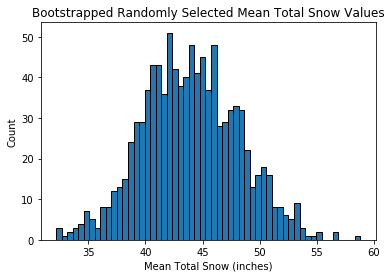

In [11]:
binsize=0.5
min4hist=np.round(np.min(P_Bootstrap_mean),1)-binsize
max4hist=np.round(np.max(P_Bootstrap_mean),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

plt.hist(P_Bootstrap_mean,nbins,edgecolor='black')
plt.xlabel('Mean Total Snow (inches)');
plt.ylabel('Count');
plt.title('Bootstrapped Randomly Selected Mean Total Snow Values');

In your own words, describe what this histogram means:

<b>Insert answer here:</b> The sample means in the above histogram are calculated from subselections that have the same size as N_snow_nino (the number 15 El Nino winters). Each count = one mean calculated from randomly-subselected values from the whole dataset. The histogram is built of 1000 repititions of this process.  The mean of all of these bootstrapped sample means is close to the true population mean (44 inches). The maximum mean of 57 inches is the maximum possible sample mean when drawing random possible values.  

#### Strategy 1: Let's assess probability of El Niño years having different snowpack using our bootstrapped distribution
What is the probability that the snowfall was lower during El Niño by chance? <br>
Using Barnes equation (1.83) on page 21  to calculate probability using the z-statistic from our bootstrapped distribution:

In [12]:
sample_mean=snow_avg_nino
sample_N=1
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z_nino=(sample_mean-population_mean)/xstd
print("sample_mean - El Nino: ",np.str(np.round(sample_mean,2)))
print("population_mean: ",np.str(np.round(population_mean,2)))
print("population_std: ",np.str(np.round(population_std,2)))
print("Z-statistic (number of standard errors that the sample mean deviates from the population mean:")
print(np.round(z_nino,2))
prob=(1-stats.norm.cdf(np.abs(z_nino)))*100 ##this is a one-sided test
print("Probability one-tailed test (percent):")
print(np.round(prob,2)) 

sample_mean - El Nino:  42.21
population_mean:  43.93
population_std:  4.21
Z-statistic (number of standard errors that the sample mean deviates from the population mean:
-0.41
Probability one-tailed test (percent):
34.14


What is the probability that the mean snowfall during El Nino differs from the population mean by chance? <br>
Using Barnes equation (1.83) on page 21 to calculate probability using z-statistic from our bootstrapped distribution

In [13]:
sample_mean=snow_avg_nino
sample_N=1
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z_nino=(sample_mean-population_mean)/xstd
print("sample_mean - El Nino: ",np.str(np.round(sample_mean,2)))
print("population_mean: ",np.str(np.round(population_mean,2)))
print("population_std: ",np.str(np.round(population_std,2)))
print("Z-statistic (number of standard errors that the sample mean deviates from the population mean):")
print(np.round(z_nino,2))
prob=(1-stats.norm.cdf(np.abs(z_nino)))*2*100 ##this is a two-sided test
print("Probability - two-tailed test (percent):")
print(np.round(prob,2)) 

sample_mean - El Nino:  42.21
population_mean:  43.93
population_std:  4.21
Z-statistic (number of standard errors that the sample mean deviates from the population mean):
-0.41
Probability - two-tailed test (percent):
68.29


Why is there a different probability for these two calculations?

<b>Insert answer here:</b> These two calculations have different a priori questions that allow for one to use a 1-tailed rather than 2-tailed test. "What is the probability that the snowfall was <b>lower</b> during El Niño by chance?" has a sign (lower) assigned to it. That means we're only testing one side of the distribution (the lower end).  while "What is the probability that the mean snowfall during El Nino differs from the population mean by chance?" has no sign assumptions attached. 

Let's repeat for La Niña: <br>
What is the probability that the snowfall was higher during La Nina just due to chance? <br>
Using Barnes equation (1.83) on page 21 to calculate probability using z-statistic from our bootstrapped distribution

In [14]:
Nbs=1000
## initialize empty array
P_Bootstrap=np.empty((Nbs,N_snow_nina))
## loop over to fill in array with randomly selected values
for ii in range(Nbs):
    P_Bootstrap[ii,:]=np.random.choice(data['Madison_TotalSnow_inches'],N_snow_nina)

## Calculate the means of your randomly selected snow total values.
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)
print(len(P_Bootstrap_mean))  ## check length to see if you averaged across the correct axis
print(np.shape(P_Bootstrap_mean)) ## another option to look at the dimensions of a variable

P_Bootstrap_mean_avg=np.mean(P_Bootstrap_mean)
print(P_Bootstrap_mean_avg)
P_Bootstrap_mean_std=np.std(P_Bootstrap_mean)
print(P_Bootstrap_mean_std)
P_Bootstrap_mean_min=np.min(P_Bootstrap_mean)
print(P_Bootstrap_mean_min)
P_Bootstrap_mean_max=np.max(P_Bootstrap_mean)
print(P_Bootstrap_mean_max)

1000
(1000,)
43.771269230769235
4.507748088227988
30.10769230769231
62.53076923076924


In [15]:
sample_mean=snow_avg_nina
sample_N=1
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z_nina=(sample_mean-population_mean)/xstd

print("sample_mean - La Nina: ",np.str(np.round(sample_mean,2)))
print("population_mean: ",np.str(np.round(population_mean,2)))
print("population_std: ",np.str(np.round(population_std,2)))
print("Z-statistic (number of standard errors that the sample mean deviates from the population mean:")
print(np.round(z_nina,2))
prob=(1-stats.norm.cdf(np.abs(z_nina)))*100 ##this is a one-sided test
print("Probability one-tailed test (percent):")
print(np.round(prob,2)) 

sample_mean - La Nina:  49.08
population_mean:  43.77
population_std:  4.51
Z-statistic (number of standard errors that the sample mean deviates from the population mean:
1.18
Probability one-tailed test (percent):
11.96


What is the probability that the snowfall during La Nina differed just due to chance? <br>
Using Barnes equation (1.83) on page 21 to calculate probability using z-statistic from our bootstrapped distribution

In [16]:
sample_mean=snow_avg_nina
sample_N=1
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z_nina=(sample_mean-population_mean)/xstd

print("sample_mean - La Nina: ",np.str(np.round(sample_mean,2)))
print("population_mean: ",np.str(np.round(population_mean,2)))
print("population_std: ",np.str(np.round(population_std,2)))
print("Z-statistic (number of standard errors that the sample mean deviates from the population mean):")
print(np.round(z_nina,2))
prob=(1-stats.norm.cdf(np.abs(z_nina)))*2*100 ##this is a two-sided test
print("Probability - two-tailed test (percent):")
print(np.round(prob,2)) 

sample_mean - La Nina:  49.08
population_mean:  43.77
population_std:  4.51
Z-statistic (number of standard errors that the sample mean deviates from the population mean):
1.18
Probability - two-tailed test (percent):
23.92


What does this say about snowfall during La Niñas as compared to the rest of the population?

<b>Insert answer here:</b> To 5% significance, we cannot statistically distinguish snow fall during La Nina years compared to the climatology. Statistically and without another line of evidence, it's likely that La Nina snowfall is no different from what occurs in any other year.

#### Strategy #2:  Forget bootstrapping, let's use a t-test...
Apply a t-test to test the null hypothesis that the means of the two samples are the same at the 95% confidence level (alpha=0.025, two-sided test) <br>
If pvalue < alpha - reject null hypothesis.

In [17]:
print('Null Hypothesis:  ENSO snow years have the same mean as the full record.')
t=stats.ttest_ind(data[data['Nino34_anomaly_prevDec']>1.0]['Madison_TotalSnow_inches'],data['Madison_TotalSnow_inches'],equal_var=False)
print(t)
if t.pvalue<0.05:
    print('Reject null hypothesis')
else:
    print('Cannot reject the null hypthesis.')


Null Hypothesis:  ENSO snow years have the same mean as the full record.
Ttest_indResult(statistic=-0.4810062342641833, pvalue=0.6350002524982791)
Cannot reject the null hypthesis.


Wait a second - What is that function doing???  Let's check it against Barnes/Hartmann notes:

Always code it yourself and understand what the function is doing.  
Word to the wise - do not use python functions without checking them!!
Let's find out what stats.ttest_ind is doing - It doesn't look like it is calculating the t-statistic
as the difference between the sample mean and the population mean.  That calculation is below...

In [18]:
## Calculate the t-statistic using the Barnes Notes - Compare a sample mean and a population mean.
## Barnes Eq. (1.96)
N=len(data[data['Nino34_anomaly_prevDec']>1.0]['Madison_TotalSnow_inches'])
print(N)
sample_mean=np.mean(data[data['Nino34_anomaly_prevDec']>1.0]['Madison_TotalSnow_inches'])
print(sample_mean)
sample_std=np.std(data[data['Nino34_anomaly_prevDec']>1.0]['Madison_TotalSnow_inches'])
print(sample_std)
population_mean=np.mean(data['Madison_TotalSnow_inches'])

## Using Barnes equation (1.96) to calculate probability using the t-statistic
print("T-statistic:")
t=(sample_mean-population_mean)/(sample_std/(np.sqrt(N-1)))
print(np.round(t,2))
print("Probability (percent):")
prob=(1-stats.t.cdf(t,N-1))*100
print(np.round(prob,2))

15
42.20666666666667
12.504157530819723
T-statistic:
-0.55
Probability (percent):
70.4


Calculate the t-statistic using the Barnes Notes - Compare two sample means.  Equation (1.108) <br>
This is also called Welch's t-test <br>
It doesn't look like the function is calculating the t-statistic using Welch's t-test! <br>
as the difference between the sample mean and the population mean.  That calculation is below... <br>
Guess using the two sample means test (i.e., Eq. 100) vs sample/population means test (i.e., Barnes Eq. ) <br>

In [19]:
sampledata1=data['Madison_TotalSnow_inches']
sampledata2=data[data.Nino34_anomaly_prevDec>1.0]['Madison_TotalSnow_inches']

N1=len(sampledata1)
N2=len(sampledata2)
print(N1)
print(N2)
print()
sample_mean1=np.mean(sampledata1)
sample_mean2=np.mean(sampledata2)
print(sample_mean1)
print(sample_mean2)
print()
sample_std1=np.std(sampledata1)
sample_std2=np.std(sampledata2)
print(sample_std1)
print(sample_std2)
print()

## Using Barnes equation (1.108) to calculate probability using the t-statistic
s=np.sqrt((N1*sample_std1**2+N2*sample_std2**2)/(N1+N2-2))
print('s:',s)
#t=(sample_mean1-sample_mean2-0)/(s*np.sqrt(1/N1+1/N2))
print("T-statistic using Welch's t-test:")
print(np.round(t,2))
print("Probability (percent):")
prob=(1-stats.t.cdf(t,N-1))*100
print(np.round(prob,2))

75
15

44.040000000000006
42.20666666666667

15.766081736859459
12.504157530819723

s: 15.443448645319027
T-statistic using Welch's t-test:
-0.55
Probability (percent):
70.4


#### Strategy #3 (provided by Vineel Yettella, now works at Apple)
How different is the El Niño sample mean from the population mean? This time we use bootstrap the difference of the sample means.

In [20]:
snow = data['Madison_TotalSnow_inches']
snow_nino = data[data['Nino34_anomaly_prevDec']>1.0]['Madison_TotalSnow_inches']

In [21]:
#1. We choose a significance level for the hypothesis test
alpha = 0.05

#2. We start by setting up a null hypothesis H0.<br>
#Our H0 will be that the difference in means of the two populations that the samples came from is equal to zero. <br>
#We will use the bootstrap to test this null hypothesis. <br>

#All hypothesis tests need a test statistic.
#Here, we'll use the difference in sample means as the test statistic.
#create array to hold bootstrapped test statistic values
bootstrap_statistic = np.empty(10000)

#bootstrap 10000 times
for i in range(1,10000):
    
    #create a resample of snow total by sampling with replacement (same length as snow total)
    resample_original = np.random.choice(snow, len(snow), replace=True)
    
    #create a resample of snow total by sampling with replacement (same length as snow_nino)
    resample_nino = np.random.choice(snow_nino, len(snow_nino), replace=True)
    
    #Compute the test statistic from the resampled data, i.e., the difference in means
    bootstrap_statistic[i] = np.mean(resample_original) - np.mean(resample_nino)



Let's plot the distribution of the test statistic - gives us the confidence interval (CI) <br>

Create 95% CI from the bootstrapped distribution. The upper limit of the CI is defined as the 97.5% percentile and the lower limit as the 2.5% percentile of the boostrap distribution, so that 95% of the distribution lies within the two limits

9.098733333333332
-5.402833333333342


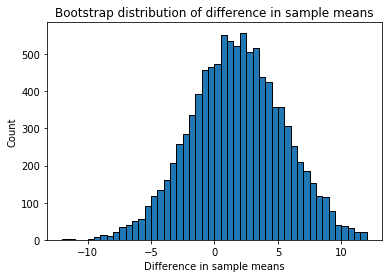

In [22]:
plt.hist(bootstrap_statistic,np.arange(-12,12.1,0.5),edgecolor='black')
plt.xlabel('Difference in sample means')
plt.ylabel('Count')
plt.title('Bootstrap distribution of difference in sample means')

CI_up = np.percentile(bootstrap_statistic, 100*(1 - alpha/2.0))
CI_lo = np.percentile(bootstrap_statistic, 100*(alpha/2.0))

print(CI_up)
print(CI_lo)

We see that the confidence interval contains zero, so we fail to reject the null hypothesis that the difference in means is equal to zero.

Looking back on all three strategies, what overall conclusion do you take away regarding Madison snowpack during El Niño and La Niña years?

<b>Insert answer here:</b>  Statistically, we cannot distinguish snowfall in El Nino or La Nina years from any other years. 

What other research strategies might you try if you wanted to determine if there is a relationship between ENSO and Madison snowpack?

<b>Insert answer here:</b> A few possible ideas: <br>
1) Use climate model simulations that have a larger sample size so that you can reassess the question with a greater sample. <br>
2) Go back to the books and determine a physical mechanism that could connect the tropical Pacific to Wisconsin. Statistically examine data for each step in the process.<br>
3) Conduct numerical model experiments (WRF? CESM? some other model) where you remove part of the key mechanism to see if Wisconsin snowfall is affected.  <br>
4) Try other observational datasets to test the uncertainty in the observations. Observations contain errors in them!

#### Questions from pdf:


1. Complete the following table: 


|         | Population | El Nino | La Nina |
|---------|------------|---------|---------|
| Mean    | 44.04 in   | 42.21 in| 49.08 in|
| Std dev | 15.87 in   | 12.94 in| 19.76 in|
| N       | 75         | 15      | 13      |

2. Use hypothesis testing to assess if the differences in snowpark are statistically significant.
Write out the 5 steps and apply. Test your hypothesis using bootstrapping.


a. State significance level: $\alpha=0.05$. <br>
b. State the null hypothesis H0 and alternative hypothesis H1: H0: Snowfall during El Nino/La Nina years is no different from the climatological snowfall. H1: Snowfall during El Nino/La Nina years is different from climatological snowfall. <br>
c. State the statistic to be used and assumptions required to use it: If using bootstrapping, then we can use the Z-statistic because we are creating a distribution of sample means.  <br>
d. State the critical region: Two-tailed test. z =  -1.96 to 1.96 for 95% significance <br>
e. Evaluate the statistic and state the conclusion: Probability for El Nino (0.6511) and La Nina (0.2394) are both above the critical p-value (0.025). Equivalently, Z_El_Nino=-0.45 and Z_La_Nina=1.18: neither is outside the critical region.<br>


3. Test the sensitivity of the results. Change the number of bootstraps. Change the
significance level. Change the temperature threshold for El Niño/La Niña to +/-0.5 degrees
Celsius or +/-2 degrees Celsius. Comment on how things change and how your conclusions
are altered.

<b> Changing number of bootstraps:</b> <br>
Increasing to 10,000: Results don't change much. Still can't reject null hypothesis. Distribution looks even more normal. <br>
Decrease to 100: Distribution of sample means is less filled out. Still can't reject null hypothesis though! <br>

<b>Change significance level to 10%:</b> <br>
El Nino/La Nina snowfall still not statistically different from climatology. <br>
Decreasing significance any further than this (especially after the fact!) is Hartmann's "mush-headed" tactic and should be avoided.

<b>Change El Nino/La Nina threshold to +2/-2 degrees C:</b> Sample size gets real small (N_elnino=3, N_lanina=1), but still no statistically significant results appear when using bootstrapping or traditional t/z tests.<br>
<b>Change El Nino/La Nina threshold to +0.5/-0.5 degrees C:</b> Sample size for El Nino and La Nina increase (23 and 25 respectively). If using a one-tailed test, La Nina snowfall becomes statistically significant. But did we really have a a priori relationship in mind for how La Nina impacts Madison snowfall? Or are we really fishing for correlations...  